In [1]:
#Importar Librerias
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
#Cargar el dataset original
main_path="drive/MyDrive/Dataset_MP"
name= "df_final.csv"
full_path=os.path.join(main_path,name)

In [3]:
df = pd.read_csv(full_path)

In [4]:
# CREAR MUESTRA REPRESENTATIVA
df_modelo, _ = train_test_split(df, train_size=500000, stratify=df['DELAYED'], random_state=42)

print("Tamaño de la muestra:", df_modelo.shape)
print("Proporción de clases:\n", df_modelo['DELAYED'].value_counts(normalize=True))

Tamaño de la muestra: (500000, 13)
Proporción de clases:
 DELAYED
0    0.81389
1    0.18611
Name: proportion, dtype: float64


In [5]:
#ENTRENAMIENTO

X = df_modelo.drop('DELAYED', axis=1)
y = df_modelo['DELAYED']

#Entrenamiento 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

colum_categorica = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
colum_numeric= ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DISTANCE',
                    'SCHEDULED_DEPARTURE_sin', 'SCHEDULED_DEPARTURE_cos',
                    'SCHEDULED_ARRIVAL_sin', 'SCHEDULED_ARRIVAL_cos', 'SCHEDULED_TIME']

def get_preprocessor(model_name):
    sparse = False if model_name == "Hist Gradient Boosting" else True
    return ColumnTransformer([
        ('num', StandardScaler(), colum_numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=sparse), colum_categorica)
    ])


In [6]:
#Modelos para la evaluacion con sus hiperparametros
modelos_param_grid = {
    "Regresión Logística": {
        "model": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
        "params": {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs']
        }
    },
    "Árbol de Decisión": {
        "model": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        "params": {
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42, class_weight='balanced'),
        "params": {
            'classifier__num_leaves': [31, 50],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__n_estimators': [100, 200]
        }
    },
    "Hist Gradient Boosting": {
        "model": HistGradientBoostingClassifier(random_state=42),
        "params": {
            'classifier__max_iter': [100, 200],
            'classifier__max_leaf_nodes': [31, 50]
        }
    }
}




Entrenando Regresión Logística con class_weight='balanced'
Mejores parámetros para Regresión Logística: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Mejor score F1 en validación: 0.360

Evaluación del modelo Regresión Logística (class_weight balanced):

Accuracy: 0.583
Precision: 0.251
Recall: 0.627
F1 Score: 0.359
AUC-ROC: 0.637


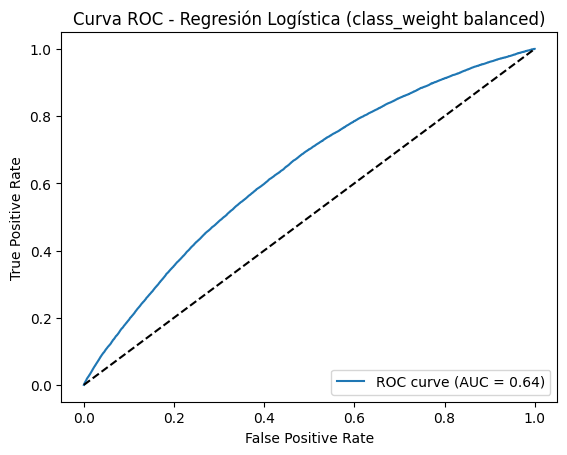


Matrix de confusión
[[58274 43462]
 [ 8676 14588]]

Matriz de confusión:


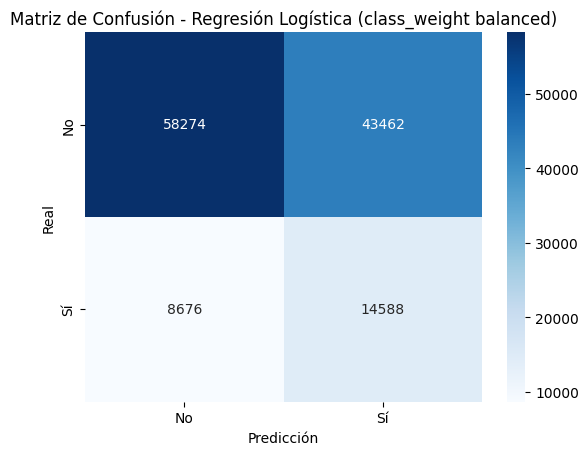


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.57      0.69    101736
           1       0.25      0.63      0.36     23264

    accuracy                           0.58    125000
   macro avg       0.56      0.60      0.52    125000
weighted avg       0.76      0.58      0.63    125000



Entrenando Árbol de Decisión con class_weight='balanced'
Mejores parámetros para Árbol de Decisión: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5}
Mejor score F1 en validación: 0.375

Evaluación del modelo Árbol de Decisión (class_weight balanced):

Accuracy: 0.62
Precision: 0.272
Recall: 0.625
F1 Score: 0.379
AUC-ROC: 0.663


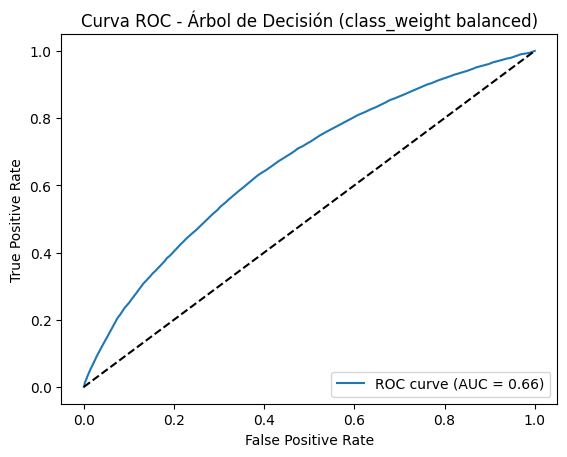


Matrix de confusión
[[62917 38819]
 [ 8725 14539]]

Matriz de confusión:


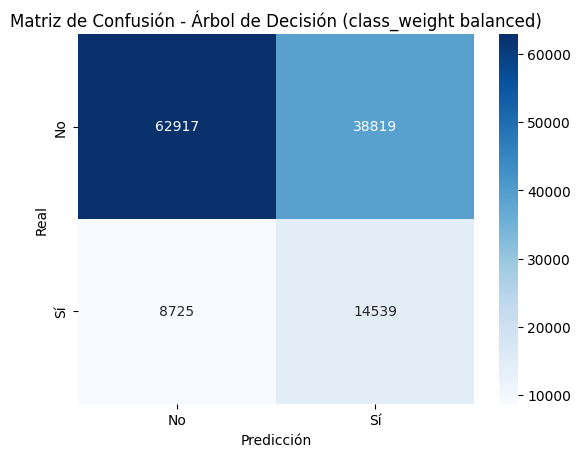


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.62      0.73    101736
           1       0.27      0.62      0.38     23264

    accuracy                           0.62    125000
   macro avg       0.58      0.62      0.55    125000
weighted avg       0.77      0.62      0.66    125000



Entrenando LightGBM con class_weight='balanced'
[LightGBM] [Info] Number of positive: 69791, number of negative: 305209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 375000, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Mejores parámetros para LightGBM: {'

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Evaluación del modelo LightGBM (class_weight balanced):

Accuracy: 0.66
Precision: 0.303
Recall: 0.635
F1 Score: 0.41
AUC-ROC: 0.706


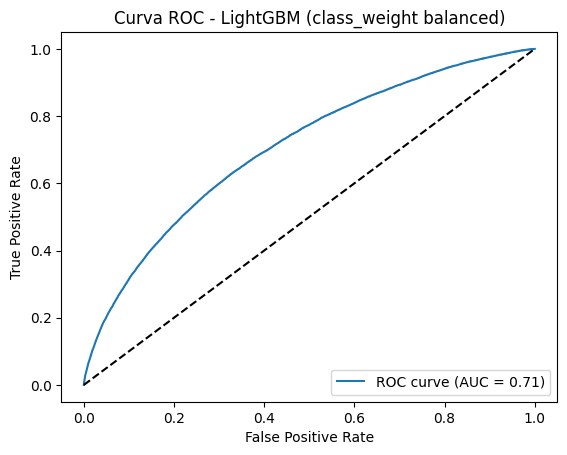


Matrix de confusión
[[67699 34037]
 [ 8485 14779]]

Matriz de confusión:


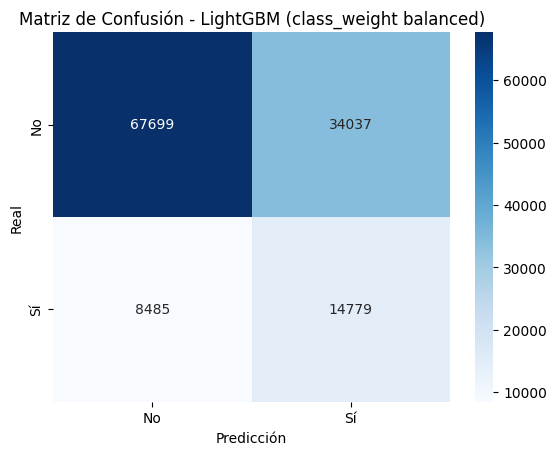


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76    101736
           1       0.30      0.64      0.41     23264

    accuracy                           0.66    125000
   macro avg       0.60      0.65      0.59    125000
weighted avg       0.78      0.66      0.70    125000



Entrenando Hist Gradient Boosting con class_weight='balanced'
Mejores parámetros para Hist Gradient Boosting: {'classifier__max_iter': 200, 'classifier__max_leaf_nodes': 50}
Mejor score F1 en validación: 0.084

Evaluación del modelo Hist Gradient Boosting (class_weight balanced):

Accuracy: 0.818
Precision: 0.662
Recall: 0.047
F1 Score: 0.087
AUC-ROC: 0.709


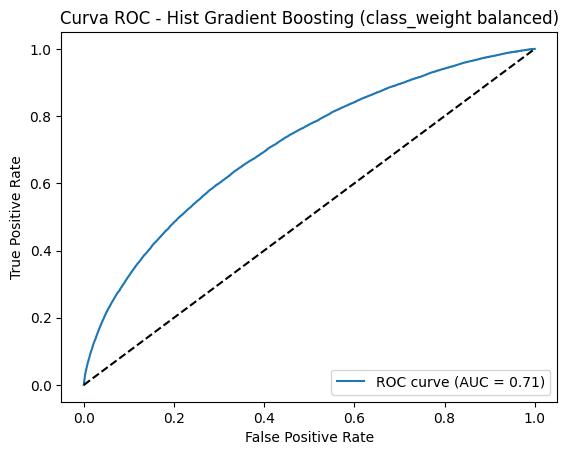


Matrix de confusión
[[101182    554]
 [ 22177   1087]]

Matriz de confusión:


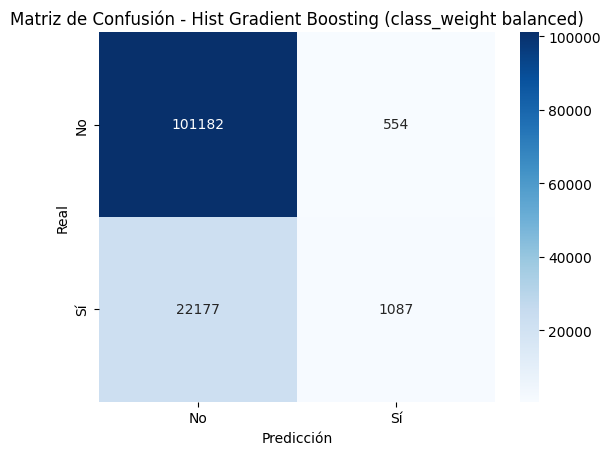


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90    101736
           1       0.66      0.05      0.09     23264

    accuracy                           0.82    125000
   macro avg       0.74      0.52      0.49    125000
weighted avg       0.79      0.82      0.75    125000



In [7]:
#Funcion para Evaluar el modelo
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    y_pred = modelo.predict(X_test)
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]
    elif hasattr(modelo, "decision_function"):
        y_prob = modelo.decision_function(X_test)
    else:
        y_prob = None

    print(f"\nEvaluación del modelo {nombre_modelo}:\n")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print("AUC-ROC:", round(roc_auc, 3))

        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {nombre_modelo}')
        plt.legend(loc="lower right")
        plt.show()

    print('\nMatrix de confusión')
    print(confusion_matrix(y_test, y_pred))
    print("\nMatriz de confusión:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

for nombre, data in modelos_param_grid.items():
    print(f"\n\nEntrenando {nombre} con class_weight='balanced'")
    preprocessor = get_preprocessor(nombre)
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('classifier', data["model"])
    ])
    grid = GridSearchCV(pipeline, param_grid=data["params"], scoring='f1', cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"Mejores parámetros para {nombre}: {grid.best_params_}")
    print(f"Mejor score F1 en validación: {grid.best_score_:.3f}")
    evaluar_modelo(grid.best_estimator_, X_test, y_test, f"{nombre} (class_weight balanced)")

In [8]:
#Comparativa y visualización de importancia de variables

import warnings
warnings.filterwarnings("ignore")

#métricas de modelos ya evaluados
resultados_plus = []

#Diccionario para guardar modelos optimizados
modelos_optimizados = {}

for nombre, data in modelos_param_grid.items():
    print(f"Procesando métricas para: {nombre}")

    #Preprocessor según el modelo
    preprocessor = get_preprocessor(nombre)

    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('classifier', data["model"])
    ])

    grid = GridSearchCV(pipeline, param_grid=data["params"], scoring='f1', cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    modelo = grid.best_estimator_
    modelos_optimizados[nombre] = modelo

    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None
    roc_auc = auc(*roc_curve(y_test, y_prob)[:2]) if y_prob is not None else None

    resultados_plus.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc
    })

Procesando métricas para: Regresión Logística
Procesando métricas para: Árbol de Decisión
Procesando métricas para: LightGBM
[LightGBM] [Info] Number of positive: 69791, number of negative: 305209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 375000, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Procesando métricas para: Hist Gradient Boosting


In [9]:
#Tabla comparativa ordenada por F1 Score
df_plus = pd.DataFrame(resultados_plus)
df_plus = df_plus.sort_values(by="F1 Score", ascending=False)

print("\nComparativa Final de Modelos:")
display(df_plus.style.background_gradient(cmap="Blues"))


Comparativa Final de Modelos:


,Modelo,Accuracy,Precision,Recall,F1 Score,AUC-ROC
2,LightGBM,0.659824,0.302749,0.635273,0.410072,0.705752
1,Árbol de Decisión,0.619648,0.272480,0.624957,0.379499,0.663323
0,Regresión Logística,0.582896,0.251301,0.627063,0.358807,0.636557
3,Hist Gradient Boosting,0.818152,0.662401,0.046725,0.087292,0.708844


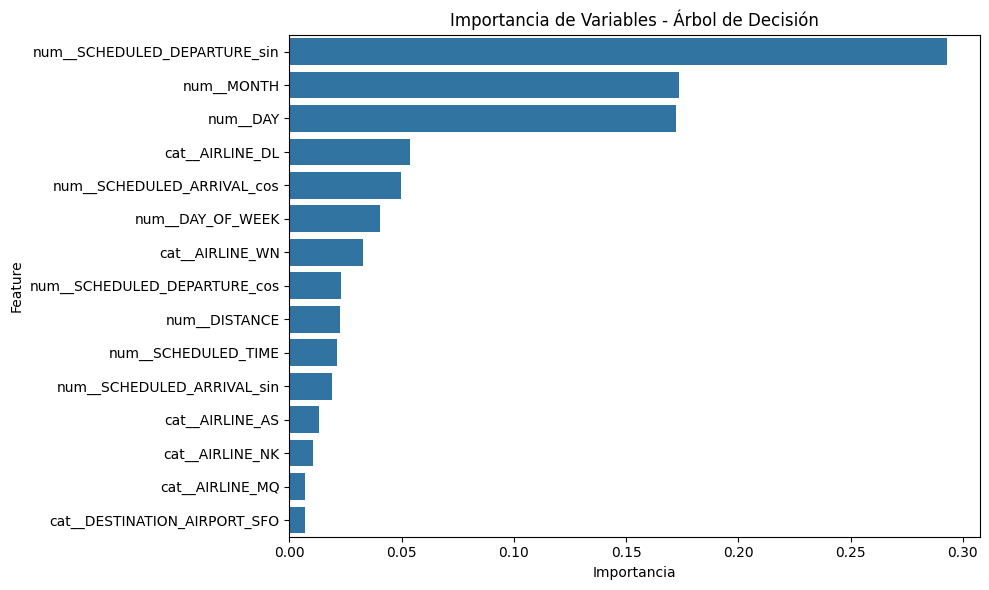

(Hist Gradient Boosting no soporta importancias de variables: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_')


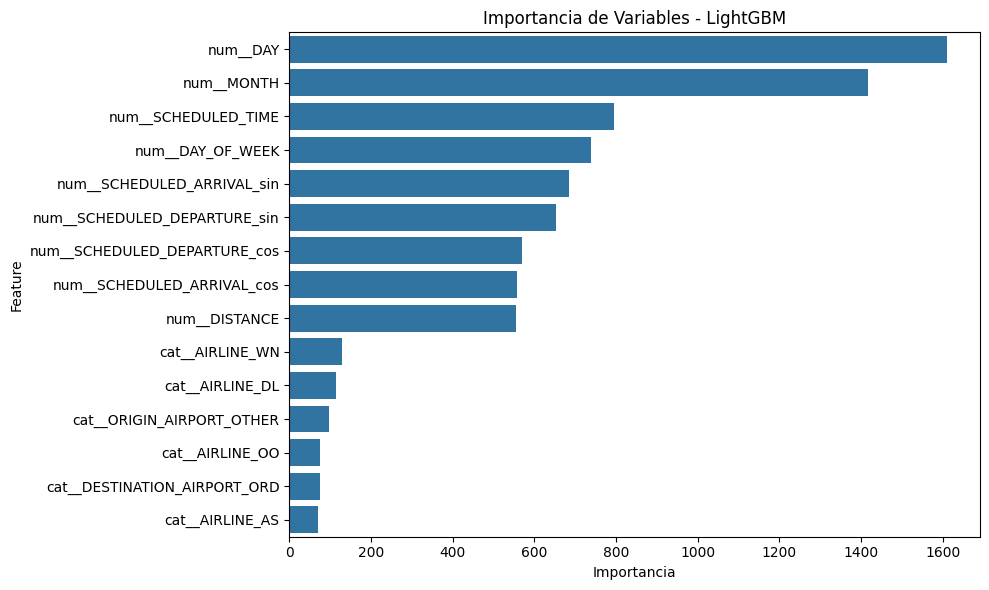

In [10]:
# Importancia de variables
def mostrar_importancia(modelo, nombre_modelo):
    try:
        importancias = modelo.named_steps['classifier'].feature_importances_
        nombres = modelo.named_steps['preprocessor'].get_feature_names_out()
        imp_df = pd.DataFrame({'Feature': nombres, 'Importancia': importancias})
        imp_df = imp_df.sort_values('Importancia', ascending=False).head(15)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=imp_df, x="Importancia", y="Feature")
        plt.title(f"Importancia de Variables - {nombre_modelo}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"({nombre_modelo} no soporta importancias de variables: {e})")

# Mostrar solo para modelos tipo árbol
for nombre in ["Árbol de Decisión", "Hist Gradient Boosting", "LightGBM"]:
    if nombre in modelos_optimizados:
        mostrar_importancia(modelos_optimizados[nombre], nombre)

In [11]:
#Ejemplo predictivo simple de datos de un nuevo vuelo

nuevo_vuelo = pd.DataFrame([{
    'MONTH': 7,
    'DAY': 22,
    'DAY_OF_WEEK': 1,
    'DISTANCE': 950,
    'SCHEDULED_DEPARTURE': 830,  # 08:30 am
    'SCHEDULED_ARRIVAL': 1045,   # 10:45 am
    'AIRLINE': 'AA',
    'ORIGIN_AIRPORT': 'JFK',
    'DESTINATION_AIRPORT': 'LAX'
}])

#Calculamos el SCHEDULED_TIME (duración en minutos)
def calcular_scheduled_time(dep, arr):
    dep = int(str(dep).zfill(4))
    arr = int(str(arr).zfill(4))
    dep_min = (dep // 100) * 60 + (dep % 100)
    arr_min = (arr // 100) * 60 + (arr % 100)
    if arr_min < dep_min:  # caso de vuelos que cruzan medianoche
        arr_min += 1440
    return arr_min - dep_min

nuevo_vuelo['SCHEDULED_TIME'] = calcular_scheduled_time(
    nuevo_vuelo['SCHEDULED_DEPARTURE'].iloc[0],
    nuevo_vuelo['SCHEDULED_ARRIVAL'].iloc[0]
)

# Aplicamos la transformación trigonométrica
def transformar_hora(df, columna):
    df[columna] = df[columna].astype(str).str.zfill(4)
    minutos = df[columna].str[:2].astype(int) * 60 + df[columna].str[2:].astype(int)
    df[columna + '_sin'] = np.sin(2 * np.pi * minutos / 1440)
    df[columna + '_cos'] = np.cos(2 * np.pi * minutos / 1440)
    return df

nuevo_vuelo = transformar_hora(nuevo_vuelo, 'SCHEDULED_DEPARTURE')
nuevo_vuelo = transformar_hora(nuevo_vuelo, 'SCHEDULED_ARRIVAL')

#Eliminamos columnas originales que no usa el modelo
nuevo_vuelo.drop(columns=['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL'], inplace=True)

#Predecimos con el mejor modelo
modelo_final = modelos_optimizados['LightGBM']
prediccion = modelo_final.predict(nuevo_vuelo)
probabilidad = modelo_final.predict_proba(nuevo_vuelo)[:, 1]

#Interpretamos resultado
print(f"¿Vuelo retrasado?: {'Sí' if prediccion[0] == 1 else 'No'}")
print(f"Probabilidad de retraso: {probabilidad[0]:.2f}")

¿Vuelo retrasado?: Sí
Probabilidad de retraso: 0.51
